In [1]:
from pprint import pprint

from sklearnex import patch_sklearn

from drowsiness_detection.run_grid_search_experiment import base

patch_sklearn()
# explicitly require this experimental feature
from sklearn.experimental import enable_halving_search_cv  # noqa
# now you can import normally from model_selection
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from drowsiness_detection import config

from drowsiness_detection.data import (session_type_mapping, get_feature_data,
    preprocess_feature_data)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
config.set_paths(30, 10)

base_config = base()
pprint(base_config)

{'exclude_by': 'a',
 'grid_search_params': {'error_score': 0,
                        'n_jobs': -1,
                        'refit': False,
                        'scoring': None,
                        'verbose': 1},
 'hyperparameter_specs': None,
 'model_name': None,
 'model_selection_name': 'halving-random',
 'n_splits': 10,
 'num_targets': 2,
 'recording_frequency': None,
 'scaler_name': '',
 'seed': 123,
 'test_size': 0.2,
 'use_dummy_data': False,
 'window_in_sec': None}


In [7]:
data = get_feature_data(data_path=config.PATHS.WINDOW_FEATURES)
X, y = preprocess_feature_data(feature_data=data,
                               exclude_sess_type=session_type_mapping[base_config["exclude_by"]], num_targets=2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=base_config["test_size"],
                                                    random_state=base_config["seed"])



0 is not drowsy, 1 is drowsy


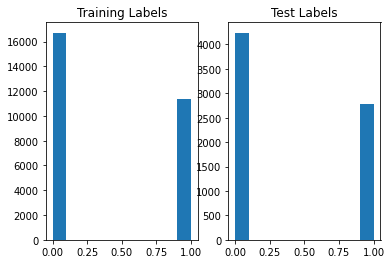

In [8]:
print("0 is not drowsy, 1 is drowsy")
fig, (ax1, ax2) = plt.subplots(1, 2)
ax1.hist(y_train)
ax1.set_title("Training Labels")
ax2.hist(y_test)
ax2.set_title("Test Labels")
plt.show()